In [ ]:
from sympy.ntheory.primetest import is_square 
from math import sqrt

import pandas as pd
import time

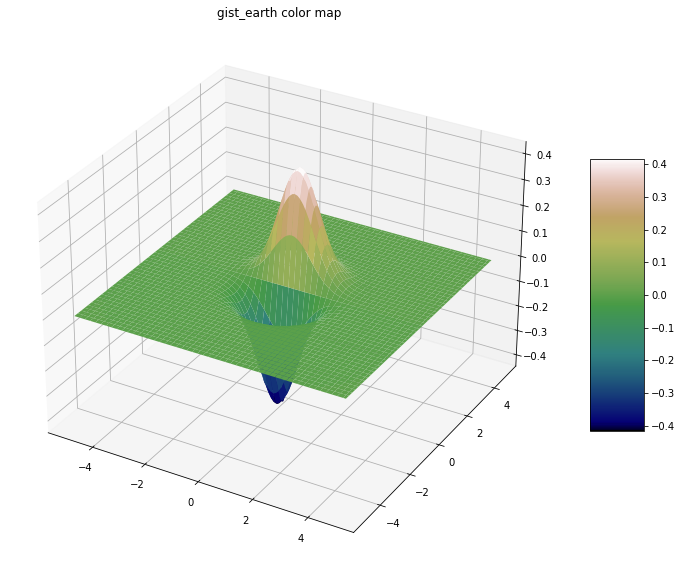

In [1]:
# taken/modified from https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.16-3D-Surface-Plots/
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

arr_x = np.arange(-5,5,0.1)
arr_y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(arr_x, arr_y)
Z = np.zeros([arr_x.size, arr_y.size])

for idx_x, x in enumerate(arr_x):
   for idx_y, y in enumerate(arr_y):
       Z[idx_x][idx_y] = x*np.exp(-x**2 - y**2)
#Z = X*np.exp(-X**2 - Y**2)

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_title('gist_earth color map')
ax1.view_init(30, -60) #default is (30, -60)=(ax1.elev, ax1.azim)
#print([ax1.elev, ax1.azim])
mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()

In [2]:
from mpmath import mp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

arr_x = np.arange(0.1,10.1,0.5)
arr_y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(arr_x, arr_y)
Z = np.zeros([arr_x.size, arr_y.size])
I = mp.sqrt(-1)

for idx_a, a in enumerate(arr_x):
   for idx_b, b in enumerate(arr_y):
       f = lambda x, t: mp.exp((-a*t**2+I*b*t)/(3*t**2+1)+I*t*x)*(x/(3*t**2+1))
       m = mp.quad(f, [0, mp.inf], [-mp.inf, mp.inf])
       mreal = m.real
       mimag = m.imag
       Z[idx_a][idx_b] = mreal

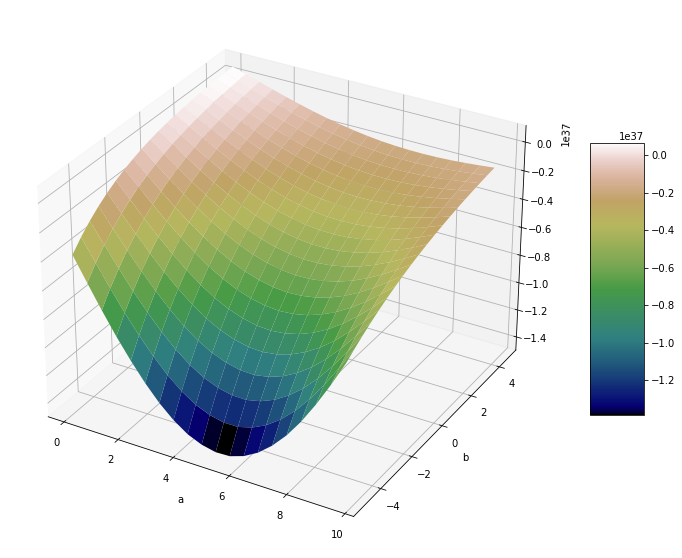

In [3]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.view_init(30, -60) #default is (30, -60)=(ax1.elev, ax1.azim)
#print([ax1.elev, ax1.azim])
ax1.set_xlabel('a')
ax1.set_ylabel('b')
mycmap = plt.get_cmap('gist_earth')
surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.show()

In [4]:
from sympy.abc import a, b, x, t
from sympy import *
from sympy import var, Integral, init_printing
init_printing()

a, b, x, t = symbols('a b x t')

integrand = exp((-a*t**2+I*b*t)/(3*t**2+1)+I*t*x)*(x/(3*t**2+1))
#integrand = exp(-x**2) * exp(pi*I*(-x)) * besselj(0, a*x) * x + b

for i in range(-1,1):
    for j in range(-1,1):
        #print(Integral(integrand.subs(a,i).subs(b,j), (x, 0, 5)).evalf())
        print(Integral(integrand.subs(a,i).subs(b,j), (t, -oo, oo), (x, 0, oo)).evalf())


Integral(x*exp(I*t*x + (t**2 - I*t)/(3*t**2 + 1))/(3*t**2 + 1), (t, -oo, oo), (x, 0, oo))
Integral(x*exp(t**2/(3*t**2 + 1) + I*t*x)/(3*t**2 + 1), (t, -oo, oo), (x, 0, oo))
Integral(x*exp(I*t*x - I*t/(3*t**2 + 1))/(3*t**2 + 1), (t, -oo, oo), (x, 0, oo))
Integral(x*exp(I*t*x)/(3*t**2 + 1), (t, -oo, oo), (x, 0, oo))
